In [16]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

In [17]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [18]:
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [19]:
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Conexión a BD
# ==============================================================================
import pyodbc

In [21]:
# Configuración de BD y conexión
# ==============================================================================
direccion_servidor = '192.168.1.32,55078'
nombre_bd = 'BDVirunet'
nombre_usuario = 'sa'
password = '123456'

try:
    conexion = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=' + 
                              direccion_servidor+';DATABASE='+nombre_bd+';UID='+nombre_usuario+';PWD=' + password)
    print("Conexión exitosa")
    
except Exception as e:
    print("Ocurrió un error al conectar a SQL Server: ", e)

Conexión exitosa


# Recolección de datos

Evaluamos la fenología de Floración

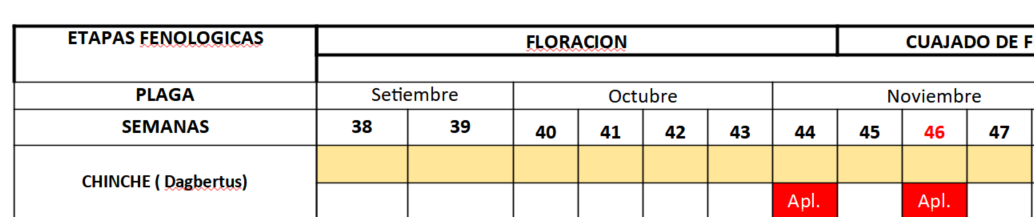

## Plagas

In [22]:
dFechaInicio = '2020-01-01'
dFechaFin = '2020-12-31'

In [23]:
try:
    with conexion.cursor() as cursor:
            consulta = "exec STP_OBTENER_TOTALIZADO_PLAGAS ?,?,?,?"
            cursor.execute(consulta, (dFechaInicio, dFechaFin, 1,1))

            rows = cursor.fetchall()
            
            cols = []
            
            for i,_ in enumerate(cursor.description):
                cols.append(cursor.description[i][0])

            pd.DataFrame(np.array(rows), columns = cols)
            
            df = pd.DataFrame(columns =['Evaluador','Fecha','Fundo','Filtrado','Turno','Lote','Grupo_Plaga','Plaga','Caracteristica','Suma','Grado','Promedio','Porcentaje'] )
            for i in range(len(rows)):
                df.loc[i] = list(rows[i])
except Exception as e: 
    print(e)

## Clima

In [31]:
data_weather = pd.ExcelFile('D:/Proyectos GitHub/Python/Datos/Datos Climaticos Viru Palto.xlsx')
df_weather = data_weather.parse('TABLA')  
data_weather.close()

In [32]:
df_weather = df_weather[df_weather['Año'] == 2020]
df_weather = df_weather[(df_weather['Semana'] >= 38) & (df_weather['Semana'] <= 47)]
df_weather.reset_index(drop = True, inplace = True)

In [33]:
df_weather = df_weather[['Fecha','ET(mm).','Tº MIN/DIA (°C)','Tº MAX/DIA (°C)','Rad. Solar Prom.','HUMEDAD PROM.', 'T° Prom/Día (°C)']]
df_weather = df_weather.rename(columns = {'ET(mm).' : 'ET', 
                                      'Tº MIN/DIA (°C)' : 'T_MIN',
                                     'Tº MAX/DIA (°C)': 'T_MAX',
                                     'Rad. Solar Prom.' : 'RS_PROM',
                                     'HUMEDAD PROM.': 'HM_PROM',
                                      'T° Prom/Día (°C)': 'TMP_PROM'})

In [34]:
df_weather.head()

,Fecha,ET,T_MIN,T_MAX,RS_PROM,HM_PROM,TMP_PROM
0,2020-09-13,2.7,12.2,21.2,194.5,90.0,16.027083
1,2020-09-14,2.3,14.7,21.1,162.9,85.0,16.331250
2,2020-09-15,2.2,15.1,20.2,161.1,86.0,16.462500
3,2020-09-16,2.2,15.3,20.3,154.0,87.0,16.681250
4,2020-09-17,2.0,14.4,20.6,143.6,87.0,16.310417


 Revisar la relación entre las variables

In [35]:
arrFiltrados = df['Filtrado'].unique()

------------------------------------------------------------
Lugar: Filtrado 10 - Turno T01 - Lote 1053
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
        Fecha    ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0  2020-05-27  2.20  16.681250    154.0     87.0      1
1  2020-06-19  2.20  16.597917    158.9     89.0      1
2  2020-06-30  3.40  17.520833    229.3     87.0      1
3  2020-07-10  2.90  17.529167    193.8     87.0      1
4  2020-07-16  3.10  17.420833    216.3     85.0      1
5  2020-07-27  3.90  18.426471    365.8     86.0      2
6  2020-08-11  3.91  17.712500    266.5     85.0      2
7  2020-08-18  3.10  16.210417    215.1     84.0      1
8  2020-08-24  3.50  16.829167    230.0     81.6      1
9  2020-08-31  3.60  18.147917    229.3     87.0      2


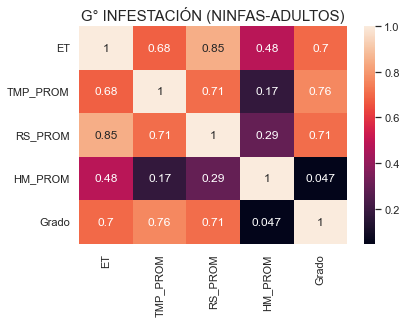

------------------------------------------------------------
Lugar: Filtrado 10 - Turno T01 - Lote 1054
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
        Fecha    ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0  2020-05-20  2.20  16.681250    154.0     87.0      1
1  2020-06-04  2.20  16.597917    158.9     89.0      1
2  2020-06-22  3.40  17.520833    229.3     87.0      1
3  2020-07-06  2.90  17.529167    193.8     87.0      1
4  2020-07-20  3.10  17.420833    216.3     85.0      2
5  2020-08-03  3.90  18.426471    365.8     86.0      2
6  2020-08-11  3.91  17.712500    266.5     85.0      1
7  2020-08-18  3.10  16.210417    215.1     84.0      1
8  2020-08-24  3.50  16.829167    230.0     81.6      1
9  2020-08-31  3.60  18.147917    229.3     87.0      3


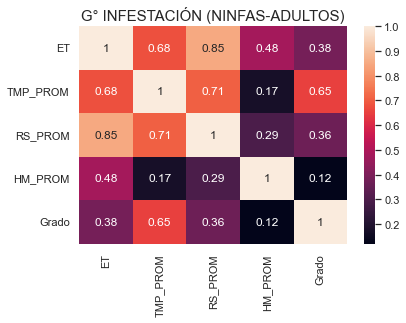

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1160
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
        Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0  2020-01-07  3.100  16.852083    220.4     87.0      4
1  2020-01-17  3.300  16.975000    225.6     87.0      4
2  2020-01-20  2.900  17.727083    198.5     87.0      5
3  2020-02-01  2.600  17.237500    170.8     84.0      2
4  2020-02-04  3.900  18.426471    365.8     86.0      1
5  2020-02-12  3.910  17.712500    266.5     85.0      2
6  2020-02-17  3.100  16.210417    215.1     84.0      1
7  2020-02-27  3.200  17.458333    217.4     86.0      1
8  2020-03-05  3.248  19.177419    285.4     82.0      1


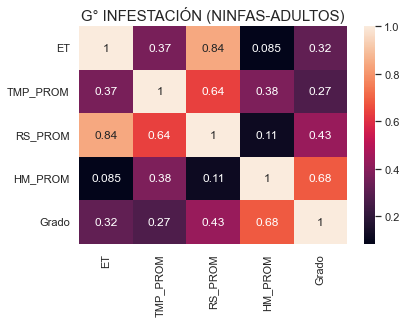

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1708
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
        Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0  2020-01-08  2.300  16.331250    162.9     85.0      3
1  2020-01-16  2.200  16.597917    158.9     89.0      4
2  2020-01-21  1.700  17.241667    116.1     87.0      4
3  2020-01-30  3.900  17.712500    268.5     85.0      3
4  2020-02-05  3.200  17.143750    224.4     86.0      3
5  2020-02-13  3.700  17.772917    250.6     86.0      1
6  2020-02-17  1.400  15.854167     96.9     86.0      3
7  2020-02-26  3.600  18.272917    241.8     85.0      1
8  2020-03-06  3.326  18.308333    221.7     83.8      2


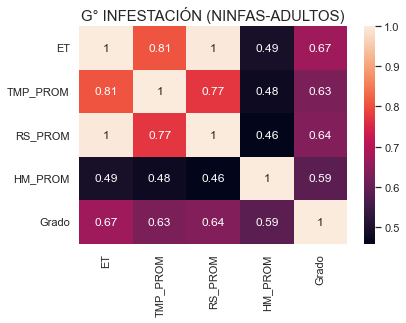

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1716
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
        Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0  2020-01-08  2.200  16.462500    161.1     86.0      3
1  2020-01-16  2.200  16.597917    158.9     89.0      4
2  2020-01-21  1.700  17.241667    116.1     87.0      4
3  2020-01-30  3.600  17.141667    259.5     85.0      2
4  2020-02-05  3.200  17.143750    224.4     86.0      3
5  2020-02-13  3.700  17.772917    250.6     86.0      1
6  2020-02-17  1.400  15.854167     96.9     86.0      2
7  2020-02-26  3.600  18.272917    241.8     85.0      1
8  2020-03-07  3.326  18.308333    221.7     83.8      2


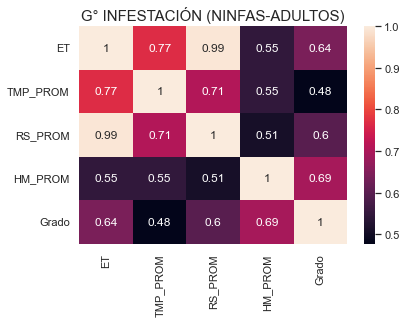

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1722
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
        Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0  2020-01-08  2.200  16.462500    161.1     86.0      3
1  2020-01-16  2.200  16.597917    158.9     89.0      4
2  2020-01-21  1.700  17.241667    116.1     87.0      4
3  2020-01-30  3.600  17.141667    259.5     85.0      2
4  2020-02-05  3.200  17.143750    224.4     86.0      3
5  2020-02-13  3.700  17.772917    250.6     86.0      1
6  2020-02-17  1.400  15.854167     96.9     86.0      3
7  2020-02-26  3.600  18.272917    241.8     85.0      1
8  2020-03-07  3.326  18.308333    221.7     83.8      2


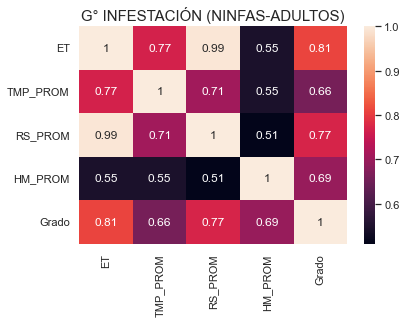

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1710
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
        Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0  2020-01-08  2.200  16.462500    161.1     86.0      3
1  2020-01-16  2.200  16.597917    158.9     89.0      4
2  2020-01-21  1.700  17.241667    116.1     87.0      4
3  2020-01-30  3.900  17.712500    268.5     85.0      2
4  2020-02-05  3.200  17.143750    224.4     86.0      4
5  2020-02-13  3.700  17.772917    250.6     86.0      3
6  2020-02-17  1.800  17.716667    126.0     83.0      2
7  2020-02-26  1.400  15.854167     96.9     86.0      1
8  2020-03-07  3.326  18.308333    221.7     83.8      2


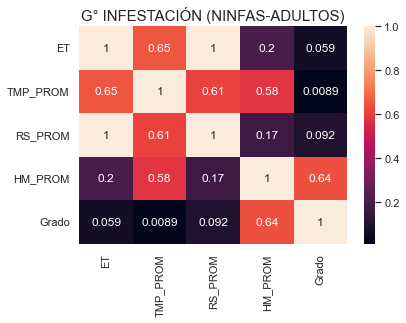

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1712
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
        Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0  2020-01-08  2.200  16.462500    161.1     86.0      2
1  2020-01-16  2.200  16.597917    158.9     89.0      4
2  2020-01-21  1.700  17.241667    116.1     87.0      4
3  2020-01-30  3.900  17.712500    268.5     85.0      2
4  2020-02-05  3.200  17.143750    224.4     86.0      4
5  2020-02-13  3.700  17.772917    250.6     86.0      2
6  2020-02-17  1.400  15.854167     96.9     86.0      3
7  2020-02-26  3.600  18.272917    241.8     85.0      1
8  2020-03-07  3.326  18.308333    221.7     83.8      2


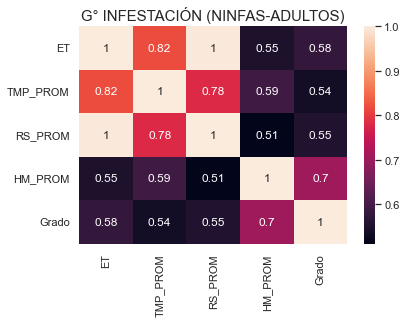

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1715
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
        Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0  2020-01-08  2.200  16.462500    161.1     86.0      3
1  2020-01-16  2.200  16.597917    158.9     89.0      4
2  2020-01-21  1.700  17.241667    116.1     87.0      4
3  2020-01-30  3.600  17.141667    259.5     85.0      2
4  2020-02-05  3.200  17.143750    224.4     86.0      4
5  2020-02-13  3.700  17.772917    250.6     86.0      2
6  2020-02-17  1.800  17.716667    126.0     83.0      2
7  2020-02-26  1.400  15.854167     96.9     86.0      1
8  2020-03-07  3.326  18.308333    221.7     83.8      2


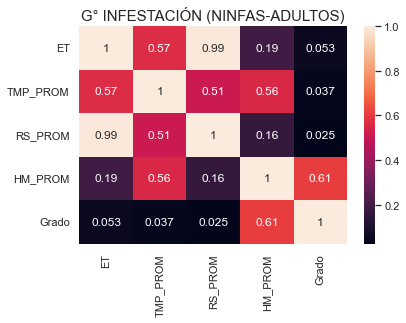

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1718
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
        Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0  2020-01-08  2.200  16.462500    161.1     86.0      3
1  2020-01-16  2.200  16.597917    158.9     89.0      4
2  2020-01-21  1.700  17.241667    116.1     87.0      4
3  2020-01-30  3.600  17.141667    259.5     85.0      2
4  2020-02-05  3.200  17.143750    224.4     86.0      4
5  2020-02-13  3.700  17.772917    250.6     86.0      3
6  2020-02-17  1.400  15.854167     96.9     86.0      2
7  2020-02-26  3.600  18.272917    241.8     85.0      1
8  2020-03-07  3.326  18.308333    221.7     83.8      2


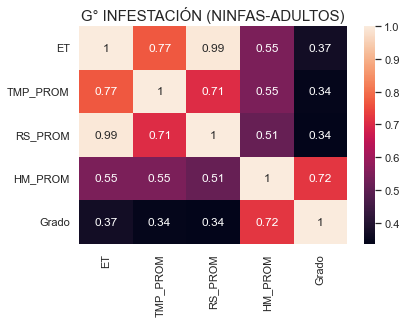

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1721
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
        Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0  2020-01-08  2.200  16.462500    161.1     86.0      2
1  2020-01-16  2.200  16.597917    158.9     89.0      4
2  2020-01-21  1.700  17.241667    116.1     87.0      4
3  2020-01-30  3.600  17.141667    259.5     85.0      2
4  2020-02-05  3.200  17.143750    224.4     86.0      4
5  2020-02-13  3.700  17.772917    250.6     86.0      2
6  2020-02-17  1.800  17.716667    126.0     83.0      2
7  2020-02-26  1.400  15.854167     96.9     86.0      1
8  2020-03-07  3.326  18.308333    221.7     83.8      1


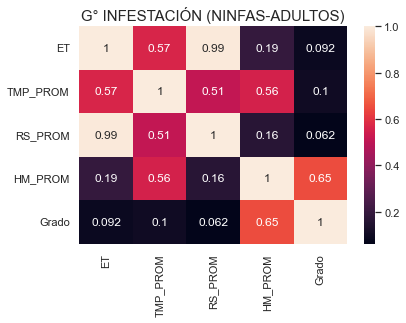

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1724
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
        Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0  2020-01-08  2.200  16.462500    161.1     86.0      3
1  2020-01-16  2.200  16.597917    158.9     89.0      4
2  2020-01-21  1.700  17.241667    116.1     87.0      4
3  2020-01-30  3.600  17.141667    259.5     85.0      2
4  2020-02-05  3.200  17.143750    224.4     86.0      4
5  2020-02-13  3.700  17.772917    250.6     86.0      2
6  2020-02-17  1.400  15.854167     96.9     86.0      2
7  2020-02-26  3.600  18.272917    241.8     85.0      1
8  2020-03-07  3.326  18.308333    221.7     83.8      1


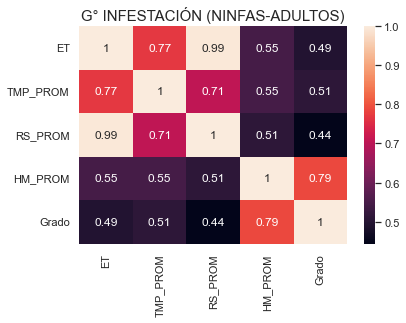

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1702
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
        Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0  2020-01-08  2.300  16.331250    162.9     85.0      2
1  2020-01-16  2.900  16.587234    210.3     87.0      4
2  2020-01-21  1.700  17.241667    116.1     87.0      4
3  2020-01-30  3.600  17.141667    259.5     85.0      4
4  2020-02-04  3.200  17.143750    224.4     86.0      4
5  2020-02-13  3.700  17.772917    250.6     86.0      2
6  2020-02-17  1.400  15.854167     96.9     86.0      3
7  2020-02-26  3.600  18.272917    241.8     85.0      1
8  2020-03-07  3.326  18.308333    221.7     83.8      2


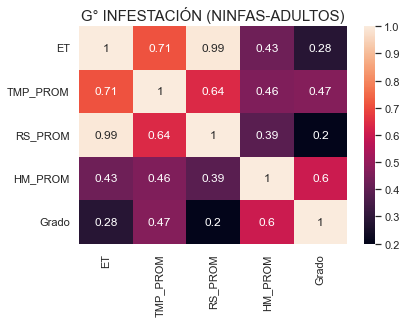

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1706
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
        Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0  2020-01-08  2.300  16.331250    162.9     85.0      2
1  2020-01-16  2.900  16.587234    210.3     87.0      4
2  2020-01-21  1.700  17.241667    116.1     87.0      4
3  2020-01-30  3.900  17.712500    268.5     85.0      2
4  2020-02-05  3.200  17.143750    224.4     86.0      3
5  2020-02-13  3.700  17.772917    250.6     86.0      2
6  2020-02-17  1.400  15.854167     96.9     86.0      3
7  2020-02-26  3.600  18.272917    241.8     85.0      1
8  2020-03-07  3.326  18.308333    221.7     83.8      1


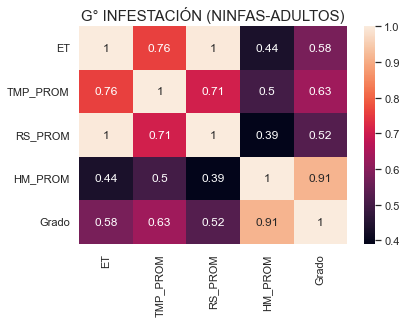

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1714
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
        Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0  2020-01-08  2.200  16.462500    161.1     86.0      2
1  2020-01-16  2.200  16.597917    158.9     89.0      4
2  2020-01-21  1.700  17.241667    116.1     87.0      4
3  2020-01-30  3.600  17.141667    259.5     85.0      2
4  2020-02-05  3.200  17.143750    224.4     86.0      4
5  2020-02-13  3.700  17.772917    250.6     86.0      1
6  2020-02-17  1.400  15.854167     96.9     86.0      2
7  2020-02-26  3.600  18.272917    241.8     85.0      1
8  2020-03-07  3.326  18.308333    221.7     83.8      2


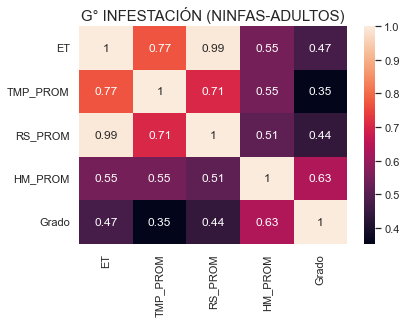

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1720
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
        Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0  2020-01-08  2.200  16.462500    161.1     86.0      2
1  2020-01-16  2.200  16.597917    158.9     89.0      4
2  2020-01-21  1.700  17.241667    116.1     87.0      4
3  2020-01-30  3.600  17.141667    259.5     85.0      2
4  2020-02-05  3.200  17.143750    224.4     86.0      4
5  2020-02-13  3.700  17.772917    250.6     86.0      1
6  2020-02-17  1.400  15.854167     96.9     86.0      2
7  2020-02-26  3.600  18.272917    241.8     85.0      1
8  2020-03-07  3.326  18.308333    221.7     83.8      2


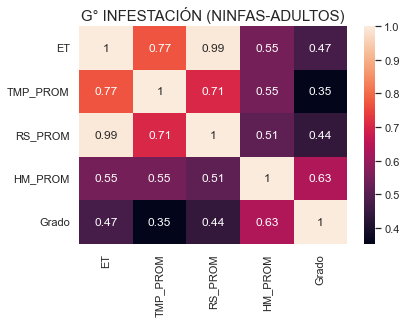

------------------------------------------------------------
Lugar: Filtrado 20 - Turno F20 - Lote 2013
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
        Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0  2020-01-08  2.300  16.331250    162.9     85.0      2
1  2020-01-17  2.900  16.587234    210.3     87.0      4
2  2020-01-24  3.900  17.712500    268.5     85.0      2
3  2020-01-30  2.100  17.018750    151.3     87.0      4
4  2020-02-07  3.600  17.954167    245.5     88.0      2
5  2020-02-14  2.740  18.016667    185.4     80.0      2
6  2020-06-04  3.760  17.070833    251.5     83.8      1
7  2020-06-13  3.200  17.458333    217.4     86.0      1
8  2020-06-19  3.826  15.604762    122.3     81.8      1


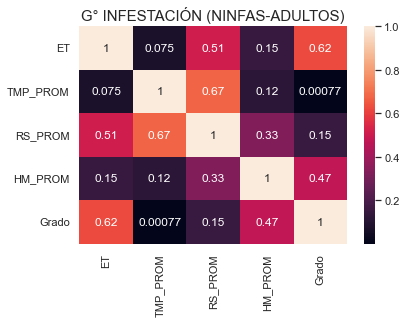

------------------------------------------------------------
Lugar: Filtrado 20 - Turno F20 - Lote 2015
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
        Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0  2020-01-08  2.300  16.331250    162.9     85.0      4
1  2020-01-17  2.900  16.587234    210.3     87.0      4
2  2020-01-24  3.900  17.712500    268.5     85.0      2
3  2020-01-30  2.100  17.018750    151.3     87.0      3
4  2020-02-07  3.600  17.954167    245.5     88.0      2
5  2020-02-14  2.740  18.016667    185.4     80.0      2
6  2020-06-06  3.760  17.070833    251.5     83.8      1
7  2020-06-13  3.200  17.458333    217.4     86.0      1
8  2020-06-20  3.326  18.308333    221.7     83.8      1


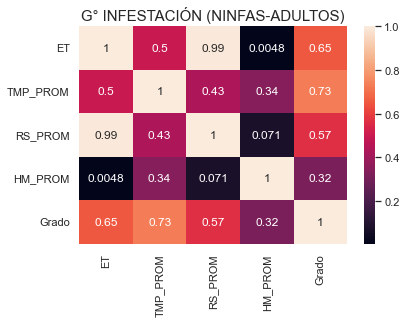

------------------------------------------------------------
Lugar: Filtrado 20 - Turno F20 - Lote 2003
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
        Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0  2020-01-09  2.300  16.331250    162.9     85.0      4
1  2020-01-17  2.900  16.587234    210.3     87.0      4
2  2020-01-24  3.900  17.712500    268.5     85.0      2
3  2020-01-31  2.100  17.018750    151.3     87.0      3
4  2020-02-07  3.700  17.772917    250.6     86.0      2
5  2020-02-14  1.200  17.420833     85.5     85.0      3
6  2020-06-06  3.760  17.070833    251.5     83.8      1
7  2020-06-12  2.400  18.172917    159.8     82.6      1
8  2020-06-19  3.826  15.604762    122.3     81.8      1


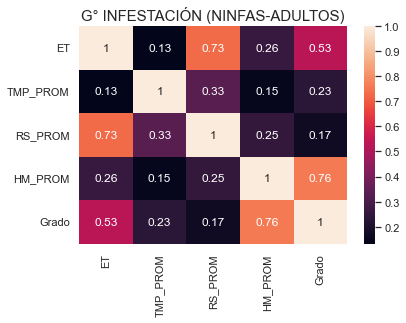

------------------------------------------------------------
Lugar: Filtrado 20 - Turno F20 - Lote 2005
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
        Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0  2020-01-09  2.300  16.331250    162.9     85.0      2
1  2020-01-17  2.900  16.587234    210.3     87.0      4
2  2020-01-24  3.900  17.712500    268.5     85.0      2
3  2020-01-31  2.100  17.018750    151.3     87.0      3
4  2020-02-07  3.700  17.772917    250.6     86.0      1
5  2020-02-14  1.200  17.420833     85.5     85.0      2
6  2020-06-27  3.760  17.070833    251.5     83.8      1
7  2020-07-04  2.400  18.172917    159.8     82.6      1
8  2020-07-10  3.826  15.604762    122.3     81.8      1


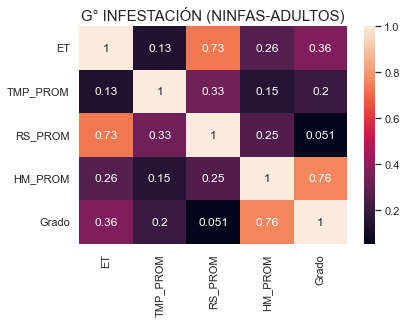

------------------------------------------------------------
Lugar: Filtrado 20 - Turno F20 - Lote 2011
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
        Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0  2020-01-08  2.300  16.331250    162.9     85.0      2
1  2020-01-17  2.900  16.587234    210.3     87.0      4
2  2020-01-24  3.900  17.712500    268.5     85.0      2
3  2020-01-31  2.100  17.018750    151.3     87.0      3
4  2020-02-07  3.600  17.954167    245.5     88.0      1
5  2020-02-14  1.200  17.420833     85.5     85.0      3
6  2020-06-26  3.760  17.070833    251.5     83.8      1
7  2020-07-04  3.200  17.458333    217.4     86.0      1
8  2020-07-10  3.826  15.604762    122.3     81.8      1


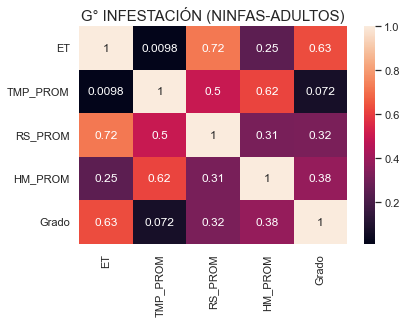

In [36]:
arrPlagas = []
dfPlagasElegidas = df[df['Plaga'] == 'OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI']
dfPlagasElegidas = dfPlagasElegidas[dfPlagasElegidas["Caracteristica"] == 'G° INFESTACIÓN (NINFAS-ADULTOS)']
dfFilter = dfPlagasElegidas

#dfFilter = df
dfCorrexLote = pd.DataFrame(columns=['Filtrado', 'Turno', 'Lote', 'Plaga','Caracteristica'])
iContador = 0
for filtrado in arrFiltrados:
    dfFiltrado = dfFilter[dfFilter['Filtrado'] == filtrado]
    arrTurno = dfFiltrado['Turno'].unique()
    for turno in arrTurno:
        dfTurno = dfFiltrado[dfFiltrado['Turno'] == turno]
        arrLote = dfTurno['Lote'].unique()
        for lote in arrLote:  
            dfLote = dfTurno[dfTurno['Lote'] == lote]
            arrPlagaxLote = dfLote['Plaga'].unique()
            for plaga in arrPlagaxLote:
                dfPlaga = dfLote[dfLote['Plaga'] == plaga]
                arrPlagaxCarac = dfPlaga['Caracteristica'].unique()
                for caracteristica in arrPlagaxCarac:
                    dfCarac = dfPlaga[dfPlaga['Caracteristica'] == caracteristica]
                    dfCarac = dfCarac.sort_values(by=['Fecha'])
         
                    dfCarac = dfCarac.groupby(['Fecha','Fundo','Filtrado','Turno','Plaga','Caracteristica'])['Grado'].sum().reset_index()
                    
                    fl_df_weather = df_weather[df_weather['Fecha'].isin(dfCarac['Fecha'])]
                    fl_df_weather = fl_df_weather.sort_values(by=['Fecha'])
                    fl_df_weather.reset_index(drop = True, inplace = True)
                    fl_df_weather = fl_df_weather.rename(columns = {'Fecha' : 'FechaClima'})
                    df_union = fl_df_weather.join(dfCarac)
                 
                    # Filtrar el dataset por las variables que se usarán
                    #df_union = df_union[['Fecha','ET','TMP_PROM','T_MIN','T_MAX','RS_PROM','HM_PROM','Grado']]        
                    df_union = df_union[['Fecha','ET','TMP_PROM','RS_PROM','HM_PROM','Grado']]   
                    
                    df_union[["Grado"]] = df_union[["Grado"]].apply(pd.to_numeric)
                    #print(df_union)
                
                    dfCorrelacion = df_union.corr().abs()
                    dfCorrelacion = dfCorrelacion.dropna()
              
                    if dfCorrelacion.shape[0] != 0:
                    
                        dfCorrelacion_index = dfCorrelacion[dfCorrelacion['Grado'] > 0.60]

                        if dfCorrelacion_index.shape[0] > 1 and df_union.shape[0] > 8:   

                            dfCorrexLote = dfCorrexLote.append({'Filtrado': filtrado,'Turno': turno,'Lote' : lote, 'Plaga': plaga,'Caracteristica': caracteristica},ignore_index=True)
                            arrPlagas.append(plaga + ' ' + caracteristica)
                            #Creando Mapa de Calor
                            sns.set()

                            print('------------------------------------------------------------')
                            print('Lugar: Filtrado {} - Turno {} - Lote {}'.format(filtrado,turno, lote))
                            print('Plaga: ', plaga)
                            print('Caracteristica: ', caracteristica)      

                            print('------------------------------------------------------------')

                            print(df_union)

                            ax = sns.heatmap(dfCorrelacion, annot = True)
                            iContador = iContador + 1
                            plt.title('{}'.format(caracteristica), fontdict = { 'fontsize' : '15'})
                            plt.show()

                            # Gráfico de distribución para cada variable numérica
                            # ==============================================================================
                            # Ajustar número de subplots en función del número de columnas

    #                         fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
    #                         axes = axes.flat
    #                         columnas_numeric = df_union[['ET','TMP_PROM','RS_PROM','HM_PROM','Grado']].select_dtypes(include=['float64', 'int']).columns

    #                         for i, colum in enumerate(columnas_numeric):
    #                             sns.histplot(
    #                                 data    = df_union[['ET','TMP_PROM','RS_PROM','HM_PROM','Grado']],
    #                                 x       = colum,
    #                                 stat    = "count",
    #                                 kde     = True,
    #                                 color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
    #                                 line_kws= {'linewidth': 2},
    #                                 alpha   = 0.3,
    #                                 ax      = axes[i]
    #                             )
    #                             axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    #                             axes[i].tick_params(labelsize = 8)
    #                             axes[i].set_xlabel("")



    #                         fig.tight_layout()
    #                         plt.subplots_adjust(top = 0.9)
    #                         fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

    #                         plt.show()




In [30]:
arrPlagas = np.array(arrPlagas)
pd.unique(arrPlagas)

array([], dtype=float64)